# Assignment 2: Inverse kinematics of our leg

Use this noteboook to document interacting with the robot class. The primary goal for this assignment is a video recording and plot rendering of your robot leg commanded to move along an *interesting* path (see the bat sign I chose in the readme page). 

__Deliverables__
1. Your leg.py file in the robot python module we are creating. The template provided has blank functions which need to be completed.
2. Two videos, a video of your robot tracing out your commanded trajectory (uploaded to youtube), and a gif of robot commanded trajectory (like on the readme page).
3. This notebook which you will use to send the move commands for the trajectory.


Team #:8

Names:Yushen Bai, Amartya B. 

# Getting started

In [1]:
# Import the robot class we are developing
import robot

In [2]:
# Make a new leg variable which is a robot.Leg class
leg = robot.Leg()

Connected!


In [3]:
leg.get_joint_pos()

#print('joint0: %f \t joint1: %f' % (leg.joint_0_pos, leg.joint_1_pos))

(0.500189924598089*pi, 0.500175603810931*pi)

# Your code below!

In [4]:
leg.set_home()

In [6]:
tt =26
xx = [-0.0712589073634220,
0.712589073634204,
1.31828978622328,
1.78147268408551,
2.45843230403800,
3.09976247030879,
3.95486935866983,
4.27553444180523,
4.27553444180523,
4.06175771971496,
3.66983372921615,
3.59857482185273,
3.27790973871734,
2.42280285035629,
1.60332541567696,
0.748218527315915,
-0.926365795724468,
-2.20902612826604,
-2.42280285035630,
-2.63657957244656,
-2.85035629453682,
-2.67220902612827,
-1.71021377672209,
-1.38954869358670,
-0.676959619952497,
-0.0712589073634220,


]

yy = [19.1270783847981,
19.0201900237530,
18.7351543942993,
18.4501187648456,
17.8800475059382,
18.3076009501188,
18.9845605700713,
17.6306413301663,
16.5617577197150,
15.9916864608076,
15.9916864608076,
16.1342042755344,
16.5973871733967,
17.0249406175772,
17.0249406175772,
16.1342042755344,
16.1342042755344,
16.2054631828979,
16.5617577197150,
17.2743467933492,
18.3788598574822,
18.7351543942993,
19.0914489311164,
19.0914489311164,
19.0914489311164,
19.1270783847981,


]

(sim_theta0,sim_theta1,sim_alpha0,sim_alpha1)=leg.move_t(tt,xx,yy)

In [8]:
# Define a draw function
import matplotlib.pyplot as plt
from sympy import sin, cos
import numpy as np


def sim_draw_leg(l0, l1, l2, theta2, theta1, alpha2, alpha1, ax=False):
    """
    This function takes in the four angles of the leg and draws
    the configuration
    """

    link1, link2, width = l1, l2, l0
    cor_range = l1 + l2
    
    if ax == False:
        ax = plt.gca()
        ax.cla()

    ax.plot(-width / 2, 0, 'ok')
    ax.plot(width / 2, 0, 'ok')

    ax.plot([-width / 2, 0], [0, 0], 'k')
    ax.plot([width / 2, 0], [0, 0], 'k')

    ax.plot(-width / 2 + np.array([0, link1 * cos(theta1)]), [0, link1 * sin(theta1)], 'k')
    ax.plot(width / 2 + np.array([0, link1 * cos(theta2)]), [0, link1 * sin(theta2)], 'k')

    ax.plot(-width / 2 + link1 * cos(theta1) + np.array([0, link2 * cos(alpha1)]), \
            link1 * sin(theta1) + np.array([0, link2 * sin(alpha1)]), 'k');
    ax.plot(width / 2 + link1 * cos(theta2) + np.array([0, link2 * cos(alpha2)]), \
            np.array(link1 * sin(theta2) + np.array([0, link2 * sin(alpha2)])), 'k');
            
    curr_x = float(width / 2 + link1 * cos(theta2) + link2 * cos(alpha2))
    curr_y = float(np.array(link1 * sin(theta2) + link2 * sin(alpha2)))

    ax.plot(curr_x, curr_y, 'ro');

    ax.axis([-cor_range, cor_range, -l1, cor_range])
    ax.invert_yaxis()


# Draw the legs and trajectory
%matplotlib qt5

for i in range(tt):
    sim_draw_leg(7.7, 7, 14, sim_theta0[i], sim_theta1[i], sim_alpha0[i], sim_alpha1[i])
    plt.plot(xx[0:i+1], yy[0:i+1])
    plt.pause(.35)

![Simulation of Trajectory gif](HW2_fish.gif)

In [9]:
print(sim_theta0)

[-0.282467478334521 + pi/2, -0.363911929983582 + pi/2, -0.463304799970297 + pi/2, -0.544589710246193 + pi/2, -0.677557688414734 + pi/2, -0.660685983330075 + pi/2, -0.610090159255426 + pi/2, -0.829727425680077 + pi/2, -0.97340898238918 + pi/2, -1.03389349965154 + pi/2, -1.00872257886048 + pi/2, -0.985761121221492 + pi/2, -0.905316326817021 + pi/2, -0.790527999843576 + pi/2, -0.730815298692783 + pi/2, -0.776596764079628 + pi/2, -0.638796173500133 + pi/2, -0.517081195695964 + pi/2, -0.458318195186741 + pi/2, -0.355262493266269 + pi/2, -0.182735432995437 + pi/2, -0.142339601475856 + pi/2, -0.172590789692562 + pi/2, -0.199562036653181 + pi/2, -0.25072568815741 + pi/2, -0.282467478334521 + pi/2]


In [10]:
print(sim_theta1)

[0.292349067291813 + pi/2, 0.261248374641351 + pi/2, 0.265793251255878 + pi/2, 0.272465488587662 + pi/2, 0.293694463457862 + pi/2, 0.16785292964432 + pi/2, -0.069825114103885 + pi/2, 0.137550304406564 + pi/2, 0.271248706211726 + pi/2, 0.355043779862583 + pi/2, 0.396240134546012 + pi/2, 0.388904929653782 + pi/2, 0.371744427525425 + pi/2, 0.40517725650082 + pi/2, 0.478141614837439 + pi/2, 0.654175486008055 + pi/2, 0.790345596435125 + pi/2, 0.879453560703238 + pi/2, 0.850348875938824 + pi/2, 0.772970885169707 + pi/2, 0.633178230014557 + pi/2, 0.567028355854313 + pi/2, 0.436375300378387 + pi/2, 0.409208304255253 + pi/2, 0.347734257773969 + pi/2, 0.292349067291813 + pi/2]


In [ ]:
import math
leg.compute_internal_angles(math.pi/2,math.pi/2)

In [5]:
m0_home=m0.encoder.pll_pos
m1_home=m1.encoder.pll_pos
print(m0_home,m1_home)

-0.2566712498664856 0.926893949508667


In [4]:
import sympy
from sympy import symbols
from sympy import sin, cos, asin, acos, pi
#m0_home_d=m0_home/(2048*4)*2*pi+pi/2
#m1_home_d=m1_home/(2048*4)*2*pi+pi/2
#print(m0_home_d,m1_home_d)

In [5]:
sim_theta0=[-0.282467478334521 + pi/2, -0.363911929983582 + pi/2, -0.463304799970297 + pi/2, -0.544589710246193 + pi/2, -0.677557688414734 + pi/2, -0.660685983330075 + pi/2, -0.610090159255426 + pi/2, -0.829727425680077 + pi/2, -0.97340898238918 + pi/2, -1.03389349965154 + pi/2, -1.00872257886048 + pi/2, -0.985761121221492 + pi/2, -0.905316326817021 + pi/2, -0.790527999843576 + pi/2, -0.730815298692783 + pi/2, -0.776596764079628 + pi/2, -0.638796173500133 + pi/2, -0.517081195695964 + pi/2, -0.458318195186741 + pi/2, -0.355262493266269 + pi/2, -0.182735432995437 + pi/2, -0.142339601475856 + pi/2, -0.172590789692562 + pi/2, -0.199562036653181 + pi/2, -0.25072568815741 + pi/2, -0.282467478334521 + pi/2]

In [6]:
sim_theta1=[0.292349067291813 + pi/2, 0.261248374641351 + pi/2, 0.265793251255878 + pi/2, 0.272465488587662 + pi/2, 0.293694463457862 + pi/2, 0.16785292964432 + pi/2, -0.069825114103885 + pi/2, 0.137550304406564 + pi/2, 0.271248706211726 + pi/2, 0.355043779862583 + pi/2, 0.396240134546012 + pi/2, 0.388904929653782 + pi/2, 0.371744427525425 + pi/2, 0.40517725650082 + pi/2, 0.478141614837439 + pi/2, 0.654175486008055 + pi/2, 0.790345596435125 + pi/2, 0.879453560703238 + pi/2, 0.850348875938824 + pi/2, 0.772970885169707 + pi/2, 0.633178230014557 + pi/2, 0.567028355854313 + pi/2, 0.436375300378387 + pi/2, 0.409208304255253 + pi/2, 0.347734257773969 + pi/2, 0.292349067291813 + pi/2]

In [9]:
import time
for i in range(26):
    leg.set_joint_pos(sim_theta0[i], sim_theta1[i])
    time.sleep(.25)

In [13]:
leg.move_home()

In [10]:
from IPython.lib.display import YouTubeVideo # for youtube videos

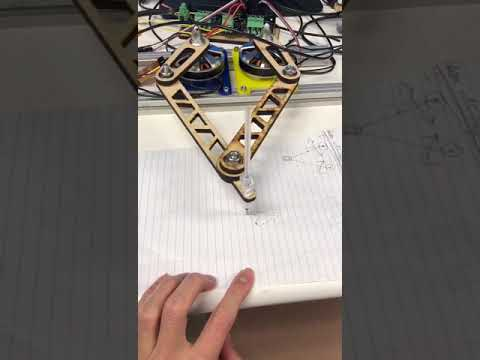

In [11]:
YouTubeVideo('w6gJsCkPz90')